<h1 align='center'> 영상처리프로그래밍 기말고사</h1>

<h3 align='center'> 담당교수 : 박섭형</h3>

<p style="text-align: right"> 2022.6.16.</p>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 아래에 자신의 이름, 학번, 학과(전공)을 적으세요.

  - 이름: 김성문
  - 학번: 20175115
  - 학과(전공): 빅데이터 전공
    
</div>

- 주의 사항
  - 시험 시간: 오후 3:00 ~ 오후 2:10
  - 시험 시간 동안에는 카메라를 켜서 자신의 모습이 화면에 나타나야 함
  - 오후 4:10에 줌을 종료하고 SmartLead에 .ipynb 파일을 업로드
    - 업로드 마감 시간: 오후 4:15
  - 파일 업로드 후에 자신의 답안지를 설명하는 개인 동영상 녹화 시작
     - 녹화할 때 Jupyter notebook 화면이 전체 화면에 나오고 설명하는 자신의 얼굴이 화면 모퉁이에 함께 녹화되어야 함
     - 문제 하나당 설명 시간이 3분을 넘지 않도록 주의
  - 동영상 파일을 SmartLead에 파일 업로드
    - 업로드 마감 시간: 오후 4:50
  - 주: 아래 두 파일을 별도로 업로드 함.
     - ipynb 파일 (마감 시간 오후 4:15)
     - 문제해설 녹화 동영상 (마감 시간 오후 4:50)


#### 채점 결과 


|  | 문제 1 | 문제 2 | 문제 3 | 문제 4 | 문제 5 | 합계 |
--|--|--|--|--|--|--
만점 | 20 | 20 | 20 | 10 | 30 | 100
득점 | 20 | 20 | 20 | 10 | 30 | 100


## 'strawberry-640.jpg' 파일을 읽고, 다음 질문에 답을 하라.

단, 모든 문제에서 영상을 표시할 때 OpenCV의 함수를 사용하지 말고 matplotlib.pyplot.imshow() 함수를 사용하라.


### 문제 0.
아래 셀의 프로그램을 실행하라.


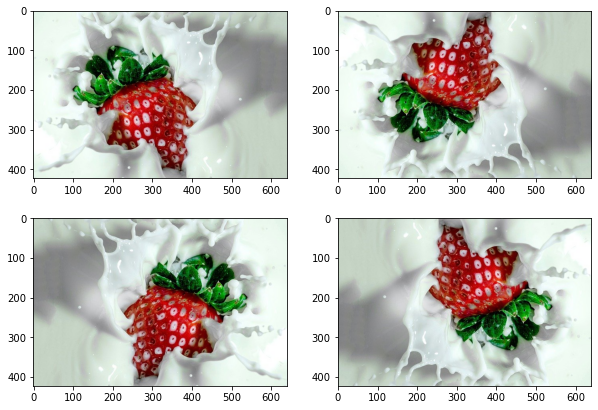

In [1]:
import cv2
import matplotlib.pyplot as plt
file_name = 'strawberry-640.jpg'
img = cv2.imread(file_name)
img2 = cv2.flip(img, 0)
img3 = cv2.flip(img, 1)
img4 = cv2.flip(img, -1)
fig, ax = plt.subplots(2,2, figsize=(10,7))
ax[0,0].imshow(img[...,::-1])
ax[0,1].imshow(img2[...,::-1])
ax[1,0].imshow(img3[...,::-1])
ax[1,1].imshow(img4[...,::-1])
plt.show()

## 문제 1.
문제 0에 있는 프로그램에서 cv2.flip 함수를 사용하지 말고, numpy 배열의 index를 조작하여 문제 0의 결과와 결과를 출력하라.

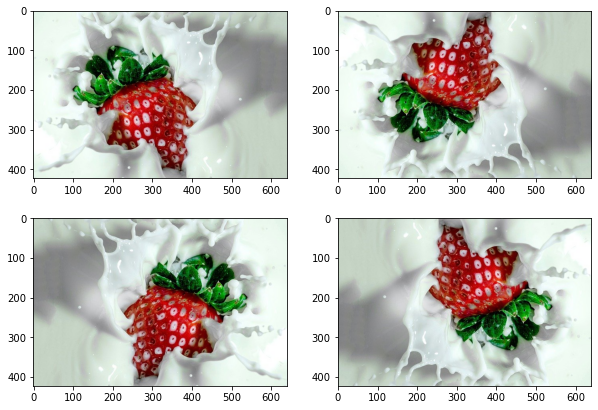

In [12]:
img = cv2.imread(file_name)
img2 = img[::-1,...]
img3 = img[:,::-1,...]
img4 = img[::-1,::-1,...]

fig, ax = plt.subplots(2,2, figsize=(10,7))
ax[0,0].imshow(img[...,::-1])
ax[0,1].imshow(img2[...,::-1])
ax[1,0].imshow(img3[...,::-1])
ax[1,1].imshow(img4[...,::-1])
plt.show()

## 문제 2.
문제 0에 있는 프로그램에서 cv2.flip 함수를 사용하지 말고, cv2의 어파인 변환 행렬을 이용해서 작성하라.

예를 들어서, 영상을 좌우로 뒤집는 변환은 다음과 같이 표현된다.

$$\begin{bmatrix} x' \\ y' \end{bmatrix} = 
\begin{bmatrix}
-1 & 0 & 0 \\
0 & 1 & 0
\end{bmatrix} 
\begin{bmatrix} x \\ y \end{bmatrix}$$

그러나, 이 변환을 수행한 후에 변환된 영상은 원래 영상이 있던 영역을 완전히 벗어나기 때문에 평행 이동을 추가해야 한다.

In [73]:
img.shape

(423, 640, 3)

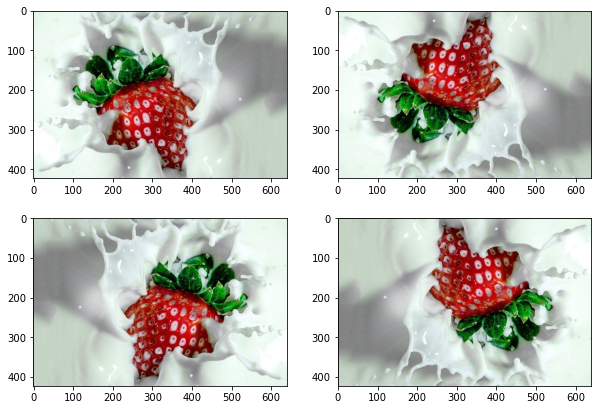

In [90]:
import numpy as np

img = cv2.imread(file_name)
img2 = np.zeros_like(img)
img3 = np.zeros_like(img)
img4 = np.zeros_like(img)
A2 = np.array([[1,0,0], [0,-1,423]], float)
img2 = cv2.warpAffine(img, A2, (img.shape[1], img.shape[0]))
A3 = np.array([[-1,0,640], [0,1,0]], float)
img3 = cv2.warpAffine(img, A3, (img.shape[1], img.shape[0]))
A4 = np.array([[-1,0,640], [0,-1,423]], float)
img4 = cv2.warpAffine(img, A4, (img.shape[1], img.shape[0]))

fig, ax = plt.subplots(2,2, figsize=(10,7))
ax[0,0].imshow(img[...,::-1])
ax[0,1].imshow(img2[...,::-1])
ax[1,0].imshow(img3[...,::-1])
ax[1,1].imshow(img4[...,::-1])
plt.show()

## 문제 3.
'strawberry-640.jpg' 파일을 읽어서, $(100, 50)$ 좌표를 기준으로 반시계 방향으로 30도 회전한 영상을 표시하라.

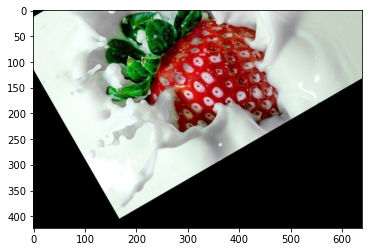

In [26]:
img = cv2.imread(file_name)

A = cv2.getRotationMatrix2D((50,100), 30, 1.0)
img_out = cv2.warpAffine(img, A, (img.shape[1], img.shape[0]))

plt.imshow(img_out[...,::-1])
plt.show()

## 문제 4.

'strawberry-640.jpg' 파일을 읽고, 그 파일에 있는 영상 데이터에 사용된 색의 수를 구하라.

In [92]:
img = cv2.imread(file_name)

In [93]:
img[...,0].min(), img[...,0].max()

(0, 255)

In [94]:
img[...,1].min(), img[...,1].max()

(0, 255)

In [95]:
img[...,2].min(), img[...,2].max()

(0, 255)

In [99]:
np.unique(img[...,0]).size, np.unique(img[...,1]).size, np.unique(img[...,2]).size

(256, 256, 256)

In [97]:
img_i = img.astype(np.uint32)
img_h = img_i[...,0]*256**2 + img_i[...,1]*256 + img_i[...,0]
np.unique(img_h).size    

# 사용된 색의 수는 17,429개이다.

17429

## 문제 5.

문제 4에서 구한 색의 수를 9개로 줄여서 모든 화소의 색을 9 개의 색 중의 하나로만 표현한 영상을 표시하는 프로그램을 작성하라.



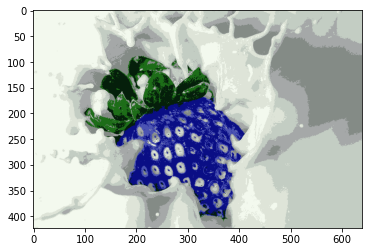

In [101]:
from sklearn import cluster
from sklearn.utils import shuffle

img_org = cv2.imread(file_name)

img = img_org.reshape(-1, 3) # 2차원 배열로 변환
K = 9
N = 3000
img_sample = shuffle(img, random_state=0)[:N]         # random으로 섞고 N개를 뽑아냄
kmeans = cluster.KMeans(n_clusters=K).fit(img_sample)  # K개의 군집으로 fit
cluster_centers = kmeans.cluster_centers_.round().clip(0, 255).astype(np.uint8)  # kmeans의 cluster center   
img_labels = kmeans.predict(img).reshape(img_org.shape[:2])    # 어떤 cluster에 가장 가까운가
img_vq = cluster_centers[img_labels]    # 모든 화소 값들이 center 값으로 바뀜

plt.imshow(img_vq)
plt.show()